In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [575]:
partA38 = pd.read_excel("Lab 6 Part A 3_8lbs.xlsx", skiprows = 1)
partA84 = pd.read_excel("Lab 6 Part A 8_4lbs.xlsx", skiprows = 1)
partBias = pd.read_excel("Lab 6 Part B Bias.xlsx", skiprows = 1)

partBias.head()

CurrentOffset = partBias['Coil Current (A)'].mean()
DisplacementOffset  = (partBias['LVIT (V)'].mean() + 0.00646)/0.1873

0        6.292744
1        6.273433
2        6.290988
3        6.275184
4        6.280454
          ...    
2647    14.615723
2648    15.024848
2649    15.721943
2650    16.404992
2651    17.168809
Name: LVIT (V), Length: 2652, dtype: float64


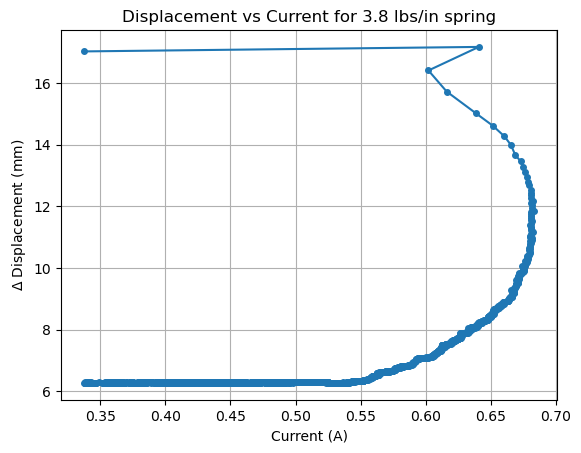

In [576]:
# Exclude the last 100 rows
partA38_trimmed = partA38.iloc[:-146]

# Recalculate displacement38 for the trimmed DataFrame
displacement38_trimmed = (partA38_trimmed['LVIT (V)'] + 0.00646) / 0.1873 - DisplacementOffset

print(displacement38_trimmed[:-1])

# Plot with the trimmed data
plt.plot(partA38_trimmed['Coil Current (A)'] - CurrentOffset, displacement38_trimmed , marker = 'o', markersize = 4)
plt.xlabel('Current (A)')
plt.ylabel(r'$\Delta$ Displacement (mm)')
plt.title('Displacement vs Current for 3.8 lbs/in spring')
plt.grid()
plt.show()


0        7.235665
1        7.235665
2        7.235665
3        7.235665
4        7.235665
          ...    
4143    13.950235
4144    14.097731
4145    14.246983
4146    14.475254
4147    14.789557
Name: LVIT (V), Length: 4148, dtype: float64


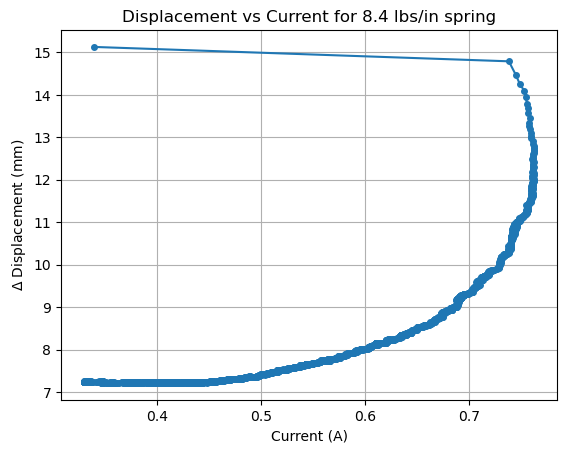

In [577]:
# Exclude the last 100 rows
partA84_trimmed = partA84.iloc[:-260]

# Recalculate displacement8_4 for the trimmed DataFrame
displacement84_trimmed = (partA84_trimmed['LVIT (V)'] + 0.00646) / 0.1873 - DisplacementOffset

print(displacement84_trimmed[:-1])

# Plot with the trimmed data
plt.plot(partA84_trimmed['Coil Current (A)'] - CurrentOffset, displacement84_trimmed, marker = 'o', markersize = 4)
plt.xlabel('Current (A)')
plt.ylabel(r'$\Delta$ Displacement (mm)')
plt.title('Displacement vs Current for 8.4 lbs/in spring')
plt.grid()
plt.show()

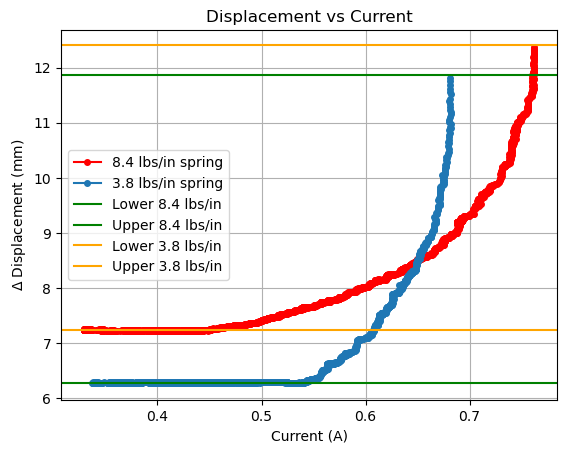

In [578]:
# Plot with the trimmed data
plt.plot(partA84_trimmed['Coil Current (A)'][:4119] - CurrentOffset, displacement84_trimmed[:4119], 
         marker = 'o', markersize = 4, color = 'r', label = '8.4 lbs/in spring')
plt.plot(partA38_trimmed['Coil Current (A)'][:2629] - CurrentOffset, displacement38_trimmed[:2629], 
         marker = 'o', markersize = 4, label = '3.8 lbs/in spring')
plt.xlabel('Current (A)')
plt.ylabel(r'$\Delta$ Displacement (mm)')
plt.title('Displacement vs Current')
plt.axhline(y = 6.27, color = 'green', label = 'Lower 8.4 lbs/in')
plt.axhline(y = 11.86, color = 'green', label = 'Upper 8.4 lbs/in')
plt.axhline(y = 7.23, color = 'orange', label = 'Lower 3.8 lbs/in')
plt.axhline(y = 12.41, color = 'orange', label = 'Upper 3.8 lbs/in')
plt.legend()
plt.grid()
plt.show()

In [579]:
print(max(partA84_trimmed['Coil Current (A)'] - CurrentOffset))
print(max(partA38_trimmed['Coil Current (A)'] - CurrentOffset))

0.7632200335835864
0.6834428505835863


In [580]:
print(partA84_trimmed['Coil Current (A)'].idxmax())
print(partA38_trimmed['Coil Current (A)'].idxmax())

4119
2629


In [581]:
display(displacement38_trimmed[2629])
displacement84_trimmed[4119]

11.862466631073026

12.413822744260422

In [582]:
print(partA84_trimmed['Coil Current (A)'].idxmin())
print(partA38_trimmed['Coil Current (A)'].idxmin())

265
28


In [583]:
display(displacement38_trimmed[265])
displacement84_trimmed[28]

6.276940736785782

7.235664709022835

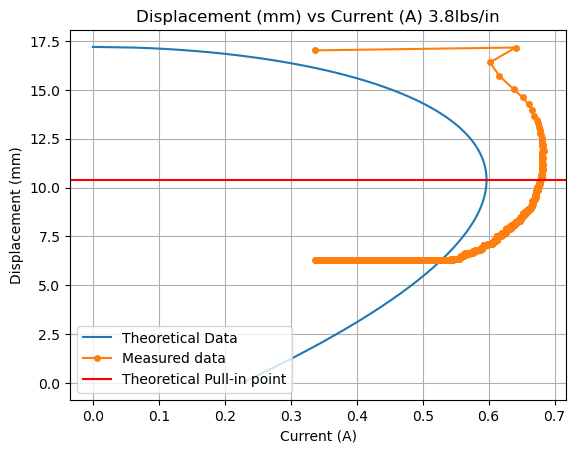

In [584]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
C1 = 2366  # Adjust this value
k2 = 0.665  # Adjust this value
L = 17.2  # Adjust this value
C2 = 3.25  # Adjust this value

# Define the range for y
y = np.linspace(0, L, 500)  # y ranges from 0 to L

# Calculate x
x_squared = (k2 * (L - y) * (C2 + y)**2) / C1
x = np.sqrt(x_squared)  # Take the square root

# Plot the function
plt.plot(x, y, label="Theoretical Data")
plt.plot(partA38_trimmed['Coil Current (A)'] - CurrentOffset, displacement38_trimmed, 
         marker = 'o', markersize = 4, label = 'Measured data')
plt.axhline(y = 10.38, color = 'red', label = 'Theoretical Pull-in point')
plt.xlabel("Current (A)")
plt.ylabel("Displacement (mm)")
plt.title("Displacement (mm) vs Current (A) 3.8lbs/in")
plt.grid()
plt.legend(loc = 'lower left')
plt.show()


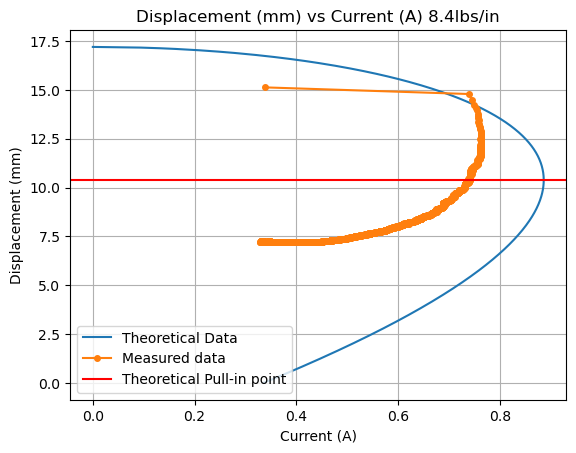

In [585]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
C1 = 2366  # Adjust this value
k2 = 1.465  # Adjust this value
L = 17.2  # Adjust this value
C2 = 3.25  # Adjust this value

# Define the range for y
y = np.linspace(0, L, 500)  # y ranges from 0 to L

# Calculate x
x_squared = (k2 * (L - y) * (C2 + y)**2) / C1
x = np.sqrt(x_squared)  # Take the square root

# Plot the function
plt.plot(x, y, label="Theoretical Data")
plt.plot(partA84_trimmed['Coil Current (A)'] - CurrentOffset, displacement84_trimmed, 
         marker = 'o', markersize = 4, label = 'Measured data')
plt.axhline(y = 10.38, color = 'red', label = 'Theoretical Pull-in point')
plt.xlabel("Current (A)")
plt.ylabel("Displacement (mm)")
plt.title("Displacement (mm) vs Current (A) 8.4lbs/in")
plt.grid()
plt.legend()
plt.show()

# Part B

2.457113059730248

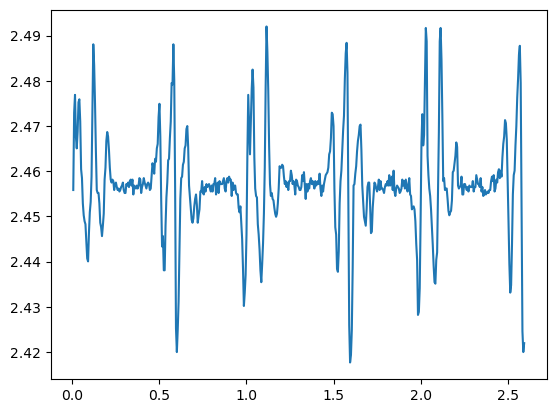

In [586]:
partB1hz = pd.read_excel("Lab 6 Part B 125mV 1Hz.xlsx", skiprows = 1)
display(partB1hz['LED (V)'].mean())
plt.plot(partB1hz['Time (s)'], partB1hz['LED (V)'])

In [587]:
import os
import pandas as pd

# Create a dictionary to store the DataFrames
dfs = {}

# Zero current offset
offset = pd.read_excel("Lab 6 Part B 600mV 1Hz offset.xlsx", skiprows = 1)

# Iterate through the files and import them
for filename in os.listdir():
    if "Part B" in filename and "200mV" in filename and filename.endswith('.xlsx'):
        print(f"Importing {filename}...")
        df = pd.read_excel(filename, skiprows = 1)
        dfs[filename[:-5]] = df  # Store the DataFrame using the file name (without extension) as the key


Importing Lab 6 Part B 200mV 11Hz.xlsx...
Importing Lab 6 Part B 200mV 11_5Hz.xlsx...
Importing Lab 6 Part B 200mV 12_5Hz.xlsx...
Importing Lab 6 Part B 200mV 14Hz.xlsx...
Importing Lab 6 Part B 200mV 16Hz.xlsx...
Importing Lab 6 Part B 200mV 18Hz.xlsx...
Importing Lab 6 Part B 200mV 1Hz.xlsx...
Importing Lab 6 Part B 200mV 20Hz.xlsx...
Importing Lab 6 Part B 200mV 3Hz.xlsx...
Importing Lab 6 Part B 200mV 5Hz.xlsx...
Importing Lab 6 Part B 200mV 7Hz.xlsx...
Importing Lab 6 Part B 200mV 9Hz.xlsx...


In [588]:
offset = pd.read_excel("Lab 6 Part B Bias.xlsx", skiprows = 1)
offset.head()

,Time (s),Load Cell (kg),LVIT (V),LED (V),Coil Voltage (V),Coil Current (A)
0,0.005,0.225699,5.440818,2.457138,0.448143,0.218152
1,0.010,0.226686,5.440818,2.456480,0.444196,0.217494
2,0.015,0.226850,5.440818,2.456151,0.444196,0.217823
3,0.020,0.226357,5.440818,2.455164,0.438276,0.218152
4,0.025,0.226357,5.440818,2.456809,0.448143,0.218152


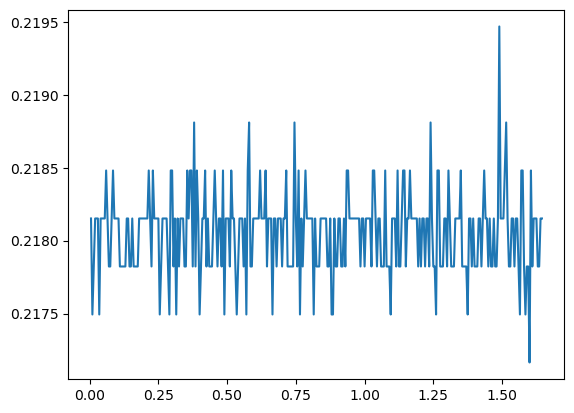

In [589]:
plt.plot(offset['Time (s)'], offset['Coil Current (A)'])
offsetmean = offset['Coil Current (A)'].mean()

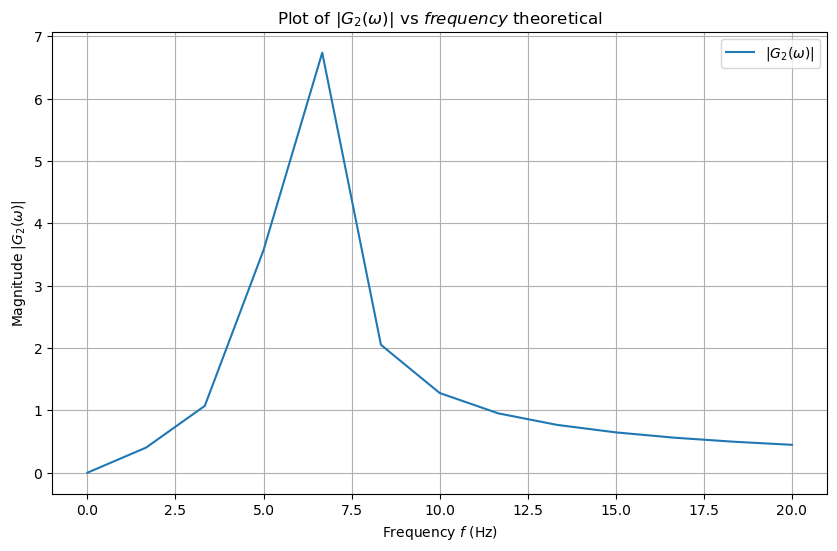

In [590]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants (example values, adjust as needed)
C1 = 0.002366    # Constant C1 N mm^2 / A^2
Ib = 0.1     # Bias current I_b A
C2 = 0.00325   # Constant C2 mm
X0 = 0.00245     # Position X_0 mm
Ks = 665    # Spring constant K_s N/mm
m = 0.285    # Mass m kg

# Define the range of omega values
freq = np.linspace(0, 20, 13)  # Avoid 0 to prevent division by zero
omega = 2 * np.pi * freq

# Compute |G2(omega)|
numerator = 2 * C1 * Ib * omega
denominator = (C2 + X0)**2 * np.abs(Ks - ((2*C1*Ib**2)/(C2+X0)**3) - (omega**2)*m)
G2_magnitude = numerator / denominator

# Plot the magnitude
plt.figure(figsize=(10, 6))
plt.plot(freq, G2_magnitude, label=r"$|G_2(\omega)|$")
plt.xlabel(r"Frequency $f$ (Hz)")
plt.ylabel(r"Magnitude $|G_2(\omega)|$")
plt.title(r"Plot of $|G_2(\omega)|$ vs $frequency$ theoretical")
plt.grid(True)
plt.legend()
plt.show()


Fitted parameters for Lab 6 Part B 200mV 11Hz: A=0.108, frequency=11.000, phi=-0.014, offset=0.104


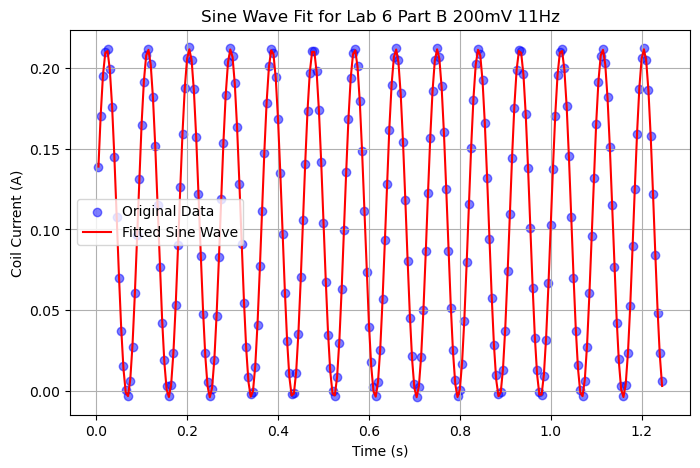

Fitted parameters for Lab 6 Part B 200mV 11_5Hz: A=0.108, frequency=11.500, phi=-1.404, offset=0.103


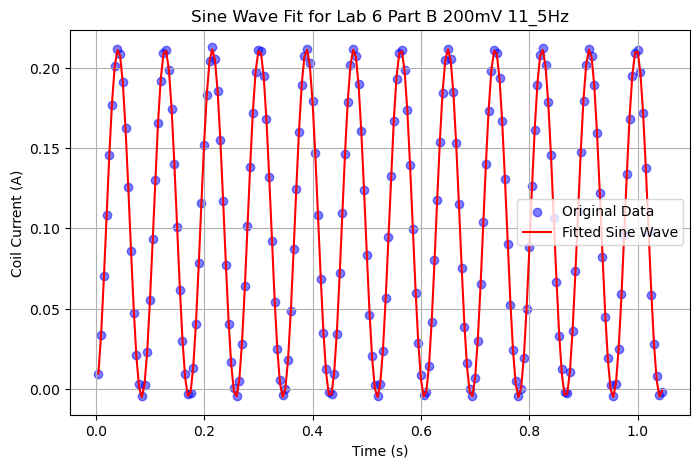

Fitted parameters for Lab 6 Part B 200mV 12_5Hz: A=-0.109, frequency=12.500, phi=1.185, offset=0.103


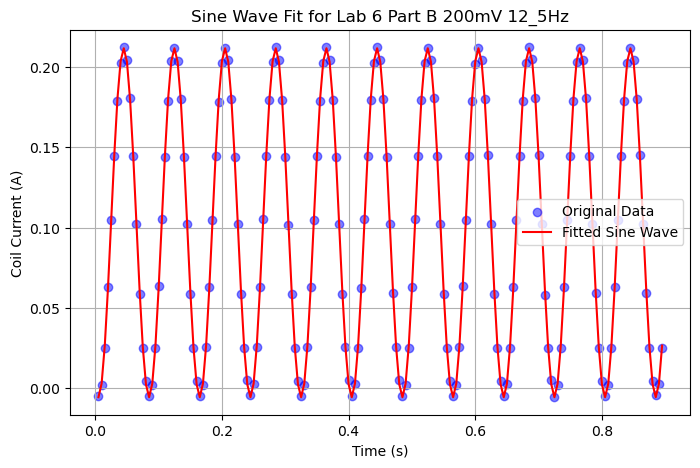

Fitted parameters for Lab 6 Part B 200mV 14Hz: A=-0.110, frequency=14.000, phi=0.117, offset=0.103


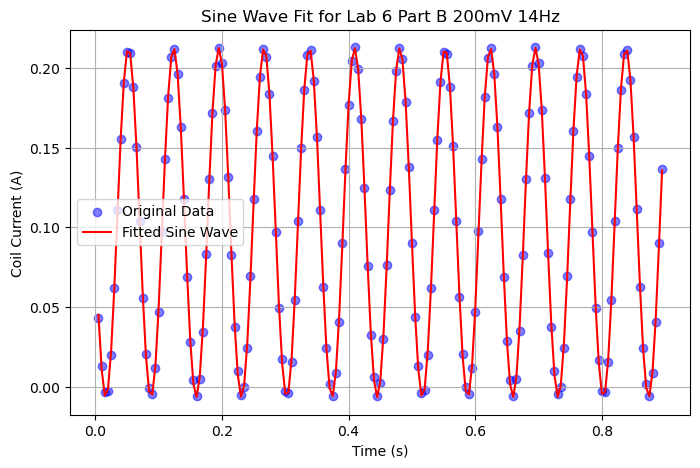

Fitted parameters for Lab 6 Part B 200mV 16Hz: A=0.111, frequency=16.000, phi=0.631, offset=0.103


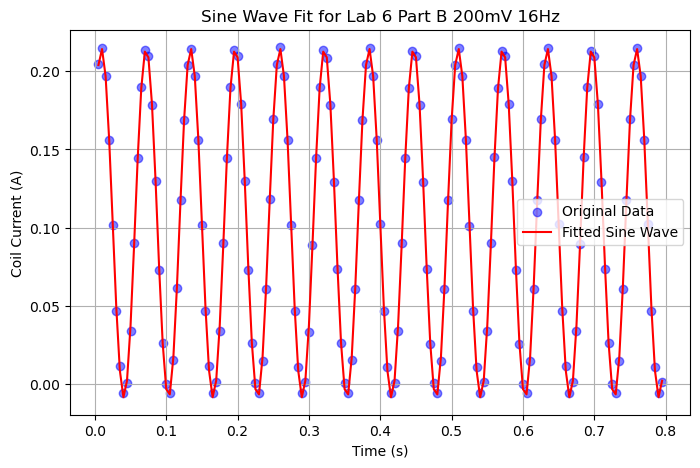

Fitted parameters for Lab 6 Part B 200mV 18Hz: A=-0.114, frequency=18.000, phi=-0.765, offset=0.103


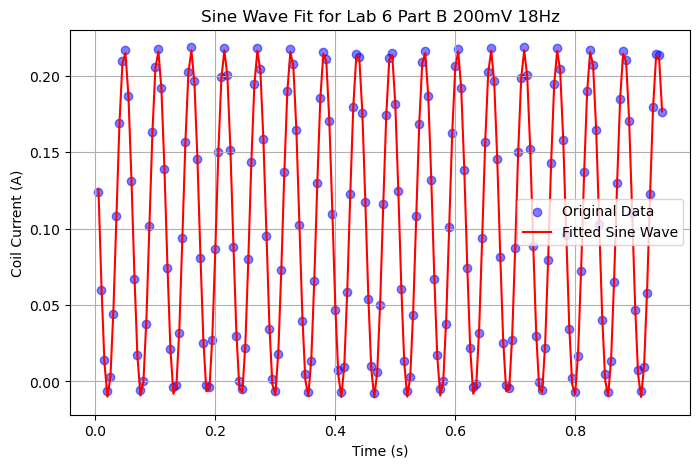

Fitted parameters for Lab 6 Part B 200mV 1Hz: A=0.104, frequency=1.000, phi=0.400, offset=0.105


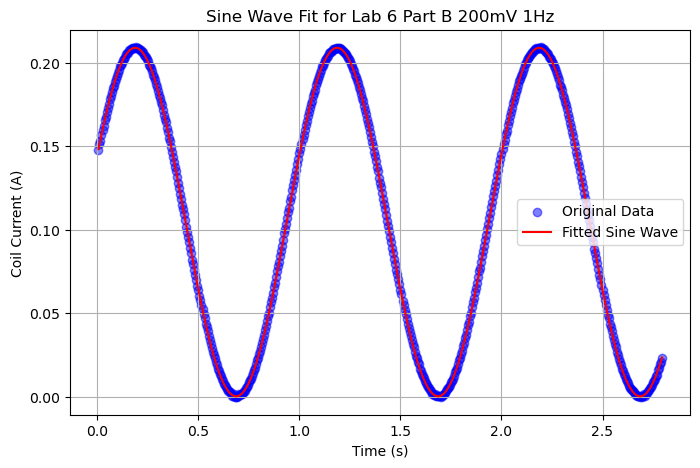

Fitted parameters for Lab 6 Part B 200mV 20Hz: A=0.116, frequency=19.999, phi=0.963, offset=0.103


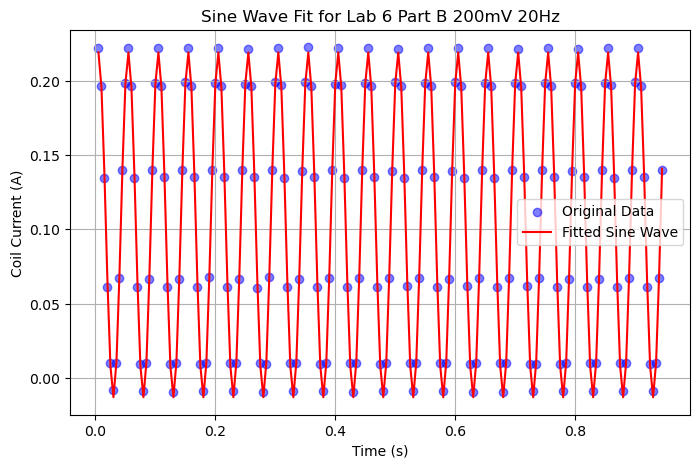

Fitted parameters for Lab 6 Part B 200mV 3Hz: A=0.105, frequency=3.000, phi=0.235, offset=0.104


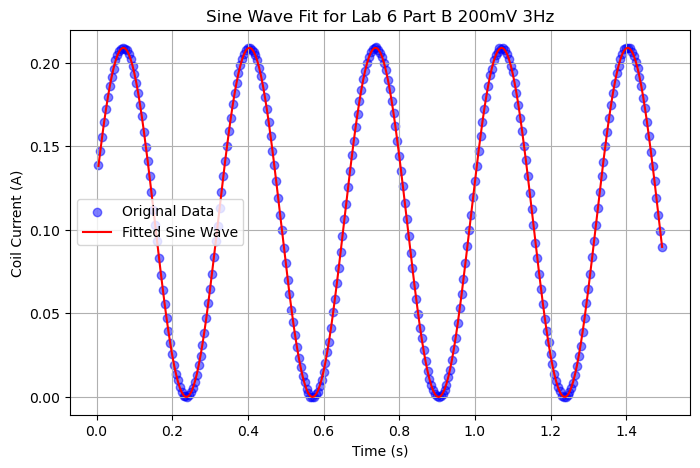

Fitted parameters for Lab 6 Part B 200mV 5Hz: A=-0.105, frequency=5.000, phi=-0.440, offset=0.104


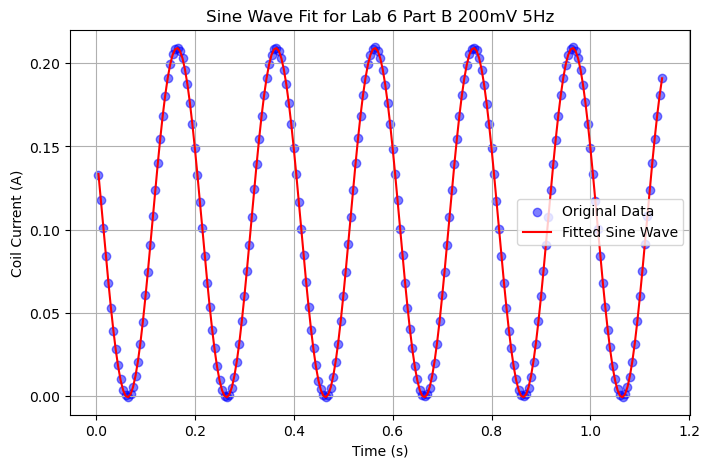

Fitted parameters for Lab 6 Part B 200mV 7Hz: A=0.106, frequency=7.000, phi=0.001, offset=0.104


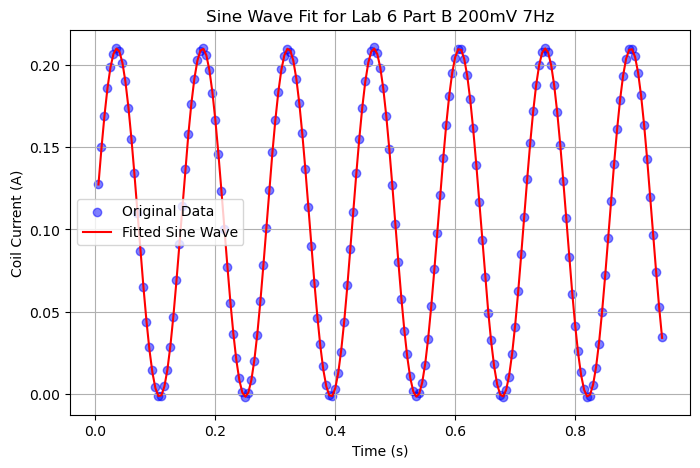

Fitted parameters for Lab 6 Part B 200mV 9Hz: A=0.107, frequency=9.000, phi=-1.357, offset=0.104


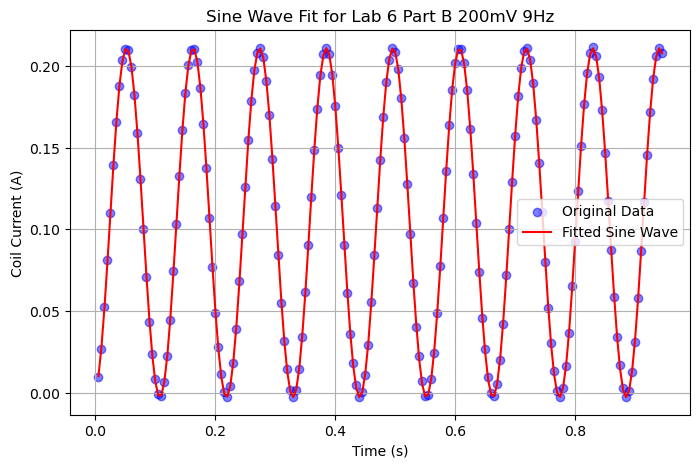

In [591]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Example sine wave function
def sine_wave(x, A, freq, phi, offset):
    """
    Sine wave function: y = A * sin(omega * x + phi) + offset
    Parameters:
        A: Amplitude
        omega: Angular frequency
        phi: Phase shift
        offset: Vertical offset
    """
    return A * np.sin(2 * np.pi * freq * x + phi) + offset


freq = [11, 11.5, 12.5, 14, 16, 18, 1, 20, 3, 5, 7, 9]

# Define the column names to fit
x_col = "Time (s)"  # Name of the x-axis column
y_col = "Coil Current (A)"  # Name of the column to fit the sine wave to

# counter
i = 0

# Iterate over the DataFrames
for name, df in dfs.items():
    x_data = df[x_col] 
    y_data = df[y_col] - offsetmean

    # Perform curve fitting
    try:
        # Initial guesses for the parameters: A, frequency, phi, offset
        initial_guess = [1, freq[i], 0, 0]
        params, _ = curve_fit(sine_wave, x_data, y_data, p0=initial_guess)

        # Extract the fitted parameters
        A, f, phi, offset = params
        print(f"Fitted parameters for {name}: A={A:.3f}, frequency={f:.3f}, phi={phi:.3f}, offset={offset:.3f}")

        # Generate the fitted sine wave
        fitted_y = sine_wave(x_data, *params)

        # Plot the original data and the fitted sine wave
        plt.figure(figsize=(8, 5))
        plt.scatter(x_data, y_data, label="Original Data", color="blue", alpha=0.5)
        plt.plot(x_data, fitted_y, label=f"Fitted Sine Wave", color="red")
        plt.title(f"Sine Wave Fit for {name}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend()
        plt.grid(True)
        plt.show()

        i += 1

    except RuntimeError as e:
        print(f"Curve fitting failed for {name}: {e}")


Fitted parameters for Lab 6 Part B 200mV 11Hz: A=-0.313, frequency=10.999, phi=-1.228, offset=2.236


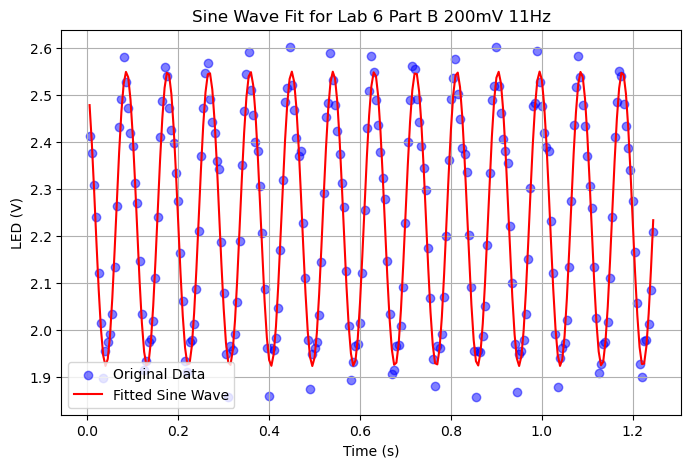

Fitted parameters for Lab 6 Part B 200mV 11_5Hz: A=0.389, frequency=11.499, phi=0.409, offset=2.232


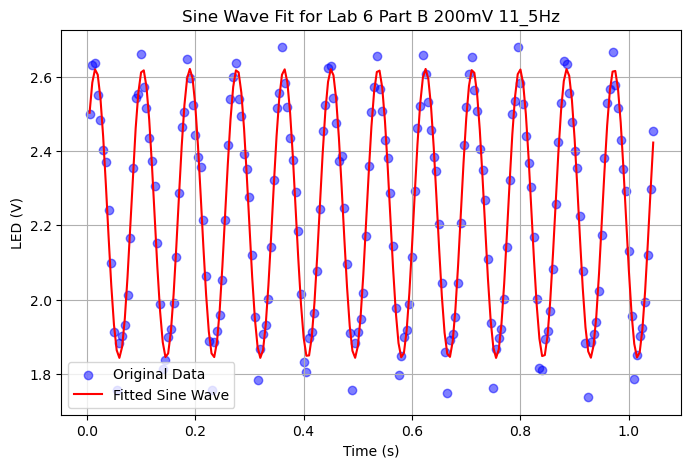

Fitted parameters for Lab 6 Part B 200mV 12_5Hz: A=0.617, frequency=12.492, phi=-0.531, offset=2.233


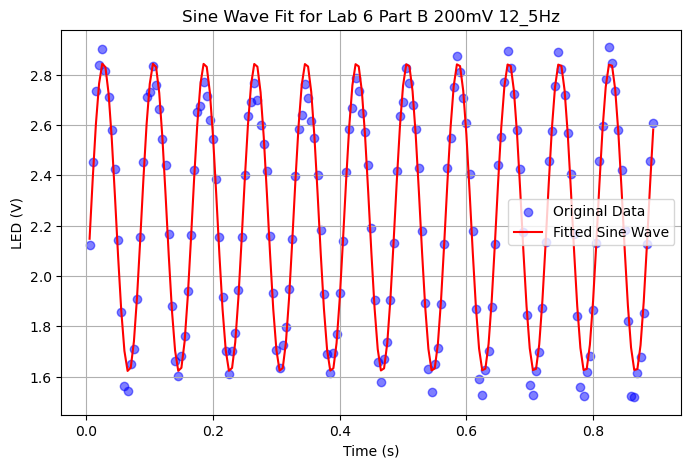

Fitted parameters for Lab 6 Part B 200mV 14Hz: A=-0.622, frequency=14.001, phi=0.728, offset=2.236


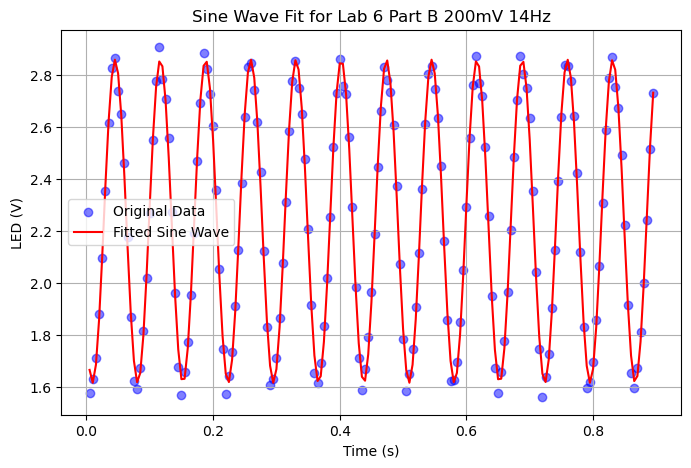

Fitted parameters for Lab 6 Part B 200mV 16Hz: A=0.392, frequency=16.000, phi=0.847, offset=2.239


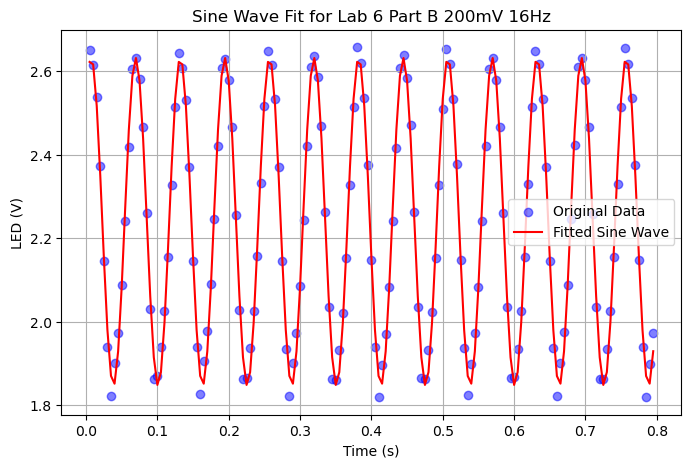

Fitted parameters for Lab 6 Part B 200mV 18Hz: A=-0.307, frequency=17.998, phi=-0.612, offset=2.239


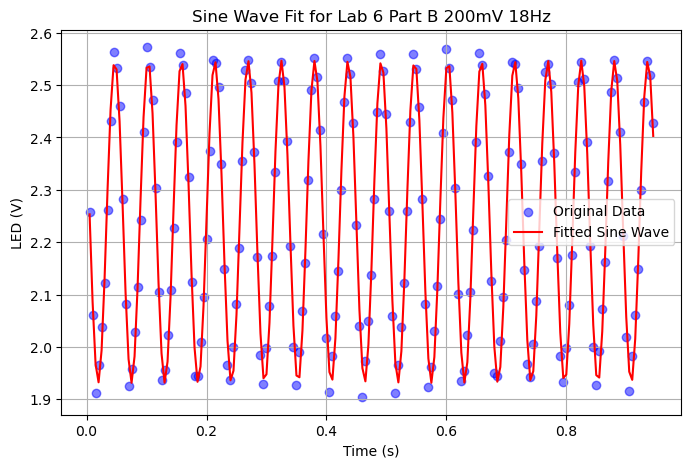

Fitted parameters for Lab 6 Part B 200mV 1Hz: A=-0.001, frequency=1.026, phi=-0.329, offset=2.239


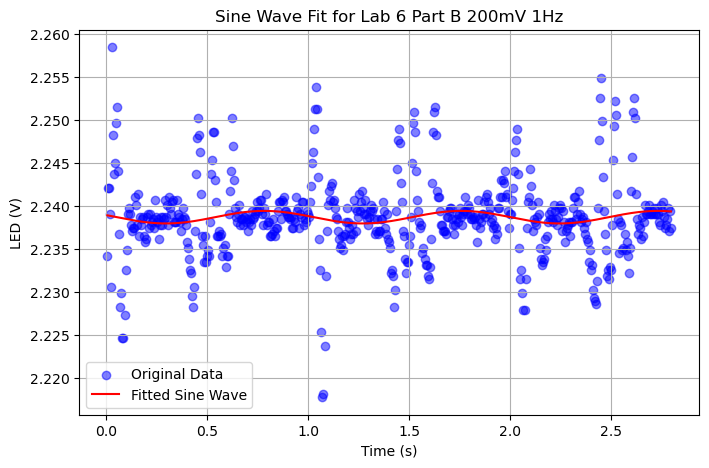

Fitted parameters for Lab 6 Part B 200mV 20Hz: A=0.276, frequency=19.999, phi=1.018, offset=2.238


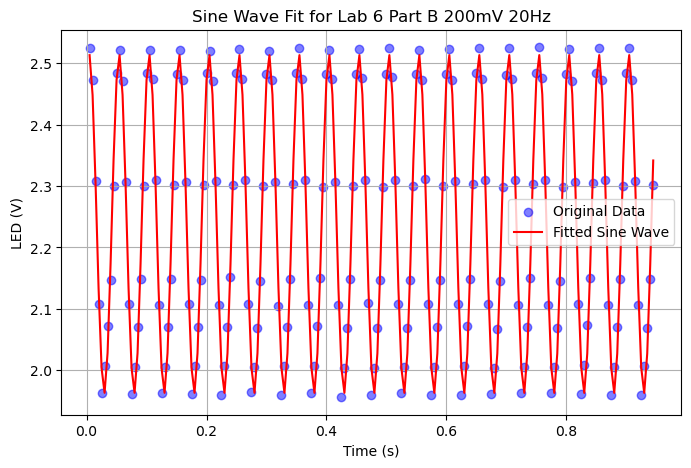

Fitted parameters for Lab 6 Part B 200mV 3Hz: A=-0.008, frequency=2.985, phi=-0.433, offset=2.239


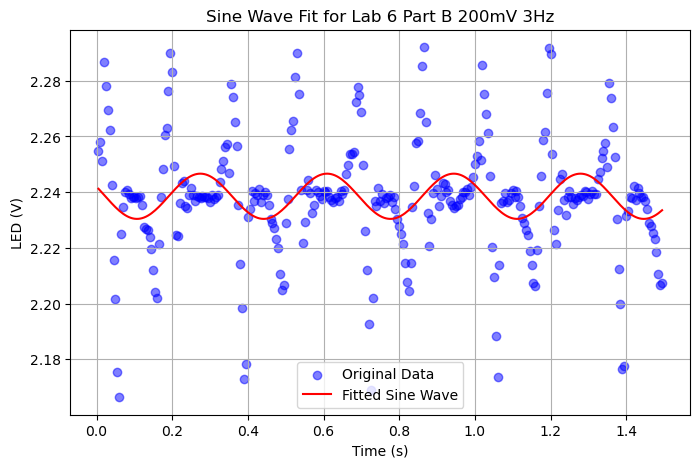

Fitted parameters for Lab 6 Part B 200mV 5Hz: A=0.029, frequency=4.960, phi=-1.003, offset=2.239


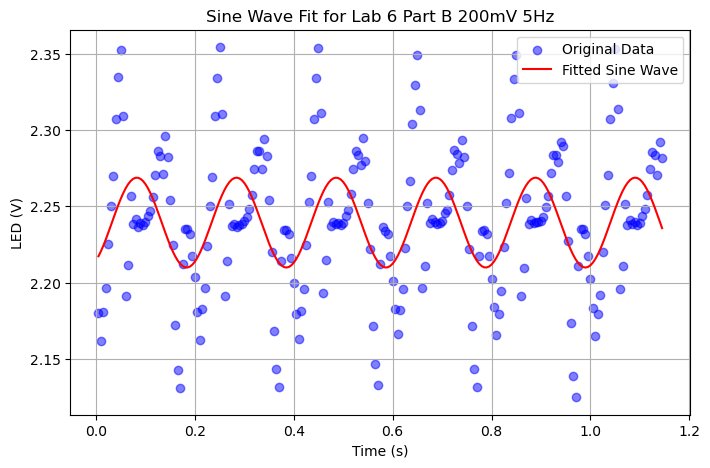

Fitted parameters for Lab 6 Part B 200mV 7Hz: A=-0.070, frequency=6.995, phi=-0.927, offset=2.239


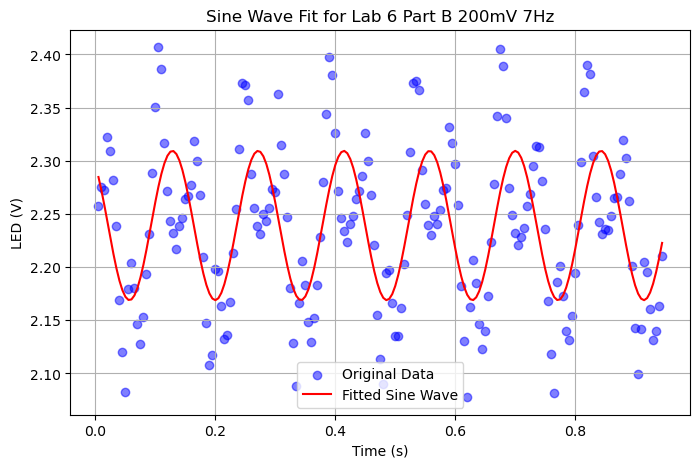

Fitted parameters for Lab 6 Part B 200mV 9Hz: A=0.128, frequency=9.005, phi=0.793, offset=2.238


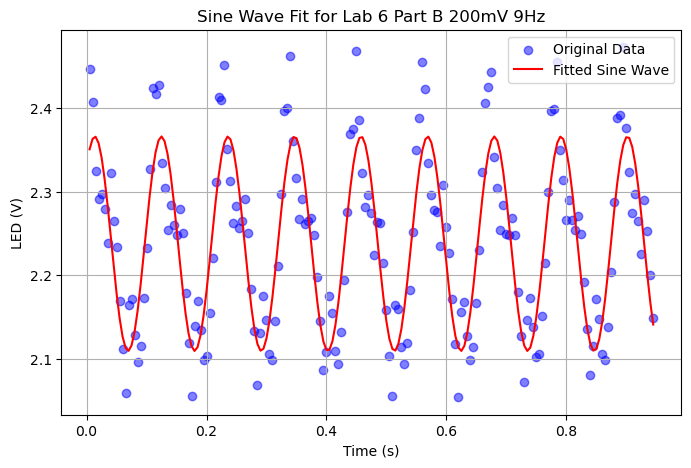

In [592]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Example sine wave function
def sine_wave(x, A, freq, phi, offset):
    """
    Sine wave function: y = A * sin(omega * x + phi) + offset
    Parameters:
        A: Amplitude
        omega: Angular frequency
        phi: Phase shift
        offset: Vertical offset
    """
    return A * np.sin(2 * np.pi * freq * x + phi) + offset


freq = [11, 11.5, 12.5, 14, 16, 18, 1, 20, 3, 5, 7, 9]

# Define the column names to fit
x_col = "Time (s)"  # Name of the x-axis column
y_col = "LED (V)"  # Name of the column to fit the sine wave to

# counter
i = 0

# Iterate over the DataFrames
for name, df in dfs.items():
    x_data = df[x_col] 
    y_data = df[y_col] - offsetmean

    # Perform curve fitting
    try:
        # Initial guesses for the parameters: A, frequency, phi, offset
        initial_guess = [1, freq[i], 0, 0]
        params, _ = curve_fit(sine_wave, x_data, y_data, p0=initial_guess)

        # Extract the fitted parameters
        A, f, phi, offset = params
        print(f"Fitted parameters for {name}: A={A:.3f}, frequency={f:.3f}, phi={phi:.3f}, offset={offset:.3f}")

        # Generate the fitted sine wave
        fitted_y = sine_wave(x_data, *params)

        # Plot the original data and the fitted sine wave
        plt.figure(figsize=(8, 5))
        plt.scatter(x_data, y_data, label="Original Data", color="blue", alpha=0.5, linestyle = '-')
        plt.plot(x_data, fitted_y, label=f"Fitted Sine Wave", color="red")
        plt.title(f"Sine Wave Fit for {name}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.legend()
        plt.grid(True)
        plt.show()

        i += 1

    except RuntimeError as e:
        print(f"Curve fitting failed for {name}: {e}")


In [593]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Example sine wave function
def sine_wave(x, A, freq, phi, offset):
    """
    Sine wave function: y = A * sin(omega * x + phi) + offset
    Parameters:
        A: Amplitude
        omega: Angular frequency
        phi: Phase shift
        offset: Vertical offset
    """
    return A * np.sin(2 * np.pi * freq * x + phi) + offset



# Sampling interval (dt) in seconds
dt = 1 / 200  # 200 Hz sample rate

pfreq = [11, 11.5, 12.5, 14, 16, 18, 1, 20, 3, 5, 7, 9]
# List to store frequency and associated value
amplitude_list = []

# Define the column names to fit
x_col = "Time (s)"  # Name of the x-axis column
y_col = "LED (V)"  # Name of the column to fit the sine wave to

# counter
i = 0

# Iterate over the DataFrames
for name, df in dfs.items():

    # Compute instantaneous velocity (finite difference method)
    df["Velocity (m/s)"] = df["LED (V)"].diff() / dt

    # Replace NaN in the first row with 0 (since diff creates NaN for the first element)
    df["Velocity (m/s)"].fillna(0, inplace=True)

    x_data = df[x_col] 
    y_data = df["Velocity (m/s)"]/df['Coil Current (A)']

    # # Perform curve fitting
    # try:
    #     # Initial guesses for the parameters: A, frequency, phi, offset
    #     initial_guess = [1, freq[i], 0, 0]
    #     params, _ = curve_fit(sine_wave, x_data, y_data, p0=initial_guess)

    #     # Extract the fitted parameters
    #     A, f, phi, offset = params
    #     print(f"Fitted parameters for {name}: A={A:.3f}, frequency={f:.3f}, phi={phi:.3f}, offset={offset:.3f}")

    #     # Generate the fitted sine wave
    #     fitted_y = sine_wave(x_data, *params)

    #     # Plot the original data and the fitted sine wave
    #     plt.figure(figsize=(8, 5))
    #     plt.scatter(x_data, y_data, label="Original Data", color="blue", alpha=0.5, linestyle = '-')
    #     plt.plot(x_data, fitted_y, label=f"Fitted Sine Wave", color="red")
    #     plt.title(f"Sine Wave Fit for {name}")
    #     plt.xlabel(x_col)
    #     plt.ylabel(y_col)
    #     plt.legend()
    #     plt.grid(True)
    #     plt.show()

    #     i += 1

    # except RuntimeError as e:
    #     print(f"Curve fitting failed for {name}: {e}")
    value = y_data.max() - y_data.mean()
    amplitude_list.append(value)

    print(f"Mean of amplitude at {freq[i]} Hz is {value:.2f}")

    i += 1



Mean of amplitude at 11 Hz is 150.79
Mean of amplitude at 11.5 Hz is 179.86
Mean of amplitude at 12.5 Hz is 271.12
Mean of amplitude at 14 Hz is 174.14
Mean of amplitude at 16 Hz is 107.39
Mean of amplitude at 18 Hz is 93.50
Mean of amplitude at 1 Hz is 14.70
Mean of amplitude at 20 Hz is 93.65
Mean of amplitude at 3 Hz is 27.53
Mean of amplitude at 5 Hz is 40.99
Mean of amplitude at 7 Hz is 58.01
Mean of amplitude at 9 Hz is 90.97


Fitted parameters: Z0=43.40501936630766, A=667.2557816928862, f0=12.749029925839906, gamma=3.4695432866242184


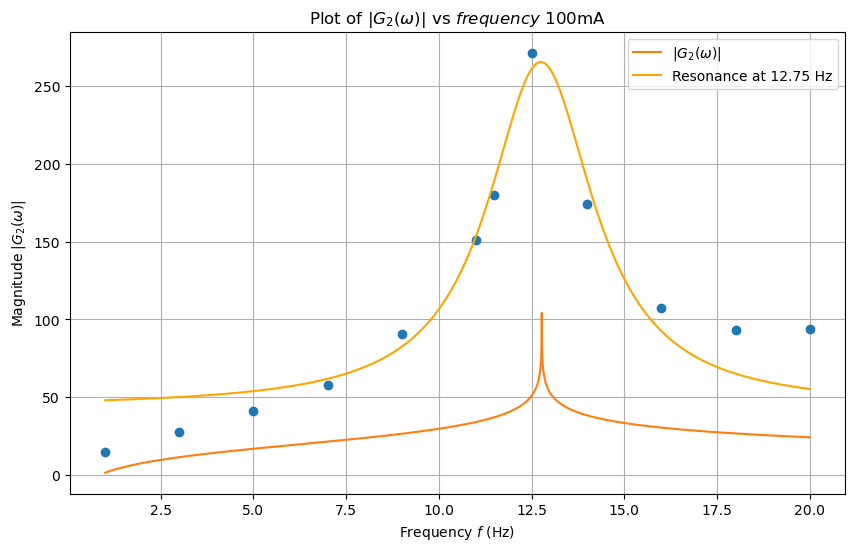

In [594]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants (example values, adjust as needed)
C1 = 0.002366    # Constant C1 N mm^2 / A^2
Ib = 0.1     # Bias current I_b A
C2 = 0.00325   # Constant C2 mm
X0 = 0.00245     # Position X_0 mm
Ks = 1608.5    # Spring constant K_s N/mm
m = 0.21    # Mass m kg

# Define the range of omega values
freq = np.linspace(1, 20, 10000)  # Avoid 0 to prevent division by zero
omega = 2 * np.pi * freq

# Define the function
def G2(omega, C1, C2, Ib, X0, Ks, m):
    numerator = (2 * C1 * Ib) * omega
    denominator = (
        (C2 + X0)**2 * (Ks - (2 * C1 * Ib**2) / (C2 + X0)**3 - omega**2 * m)
    )
    return np.abs(numerator / denominator)

# Compute the magnitude of G2(omega)
G2_values = G2(omega, C1, C2, Ib, X0, Ks, m)

# Define the Lorentzian function
def lorentzian(f, Z0, A, f0, gamma):
    return Z0 + (A / ((f - f0)**2 + (gamma / 2)**2))

# Fit the Lorentzian model to your data
initial_guess = [min(amplitude_list), max(amplitude_list), 12.2, 1.0]
params, _ = curve_fit(lorentzian, pfreq, amplitude_list, p0=initial_guess)

# Extract fitted parameters
Z0, A, f0, gamma = params
print(f"Fitted parameters: Z0={Z0}, A={A}, f0={f0}, gamma={gamma}")

# Generate fitted curve data
f_fit = np.linspace(min(pfreq), max(pfreq), 500)
Z_fit = lorentzian(f_fit, *params)

# Plot the magnitude
plt.figure(figsize=(10, 6))
plt.plot(pfreq, amplitude_list, marker = 'o', linestyle = 'none')
plt.plot(freq, 20 * np.log10(G2_values)+ 25, label=r"$|G_2(\omega)|$")
plt.plot(f_fit, Z_fit, '-', color='orange', label=f'Resonance at {f0:.2f} Hz')
plt.axvline(x = 12.75, color = 'purple', linestyle = '')
plt.xlabel(r"Frequency $f$ (Hz)")
plt.ylabel(r"Magnitude $|G_2(\omega)|$")
plt.title(r"Plot of $|G_2(\omega)|$ vs $frequency$ 100mA")
plt.grid(True)
plt.legend()
plt.show()

In [595]:
# Create a dictionary to store the DataFrames
dfs = {}

# Zero current offset
offset = pd.read_excel("Lab 6 Part B 600mV 1Hz offset.xlsx", skiprows = 1)

# Iterate through the files and import them
for filename in os.listdir():
    if "Part B" in filename and "125mV" in filename and filename.endswith('.xlsx'):
        print(f"Importing {filename}...")
        df = pd.read_excel(filename, skiprows = 1)
        dfs[filename[:-5]] = df  # Store the DataFrame using the file name (without extension) as the key

Importing Lab 6 Part B 125mV 10Hz.xlsx...
Importing Lab 6 Part B 125mV 11Hz.xlsx...
Importing Lab 6 Part B 125mV 13Hz.xlsx...
Importing Lab 6 Part B 125mV 15Hz.xlsx...
Importing Lab 6 Part B 125mV 18Hz.xlsx...
Importing Lab 6 Part B 125mV 1Hz.xlsx...
Importing Lab 6 Part B 125mV 20Hz.xlsx...
Importing Lab 6 Part B 125mV 3Hz.xlsx...
Importing Lab 6 Part B 125mV 5Hz.xlsx...
Importing Lab 6 Part B 125mV 7Hz.xlsx...
Importing Lab 6 Part B 125mV 9Hz.xlsx...


In [596]:
# Example sine wave function
def sine_wave(x, A, freq, phi, offset):
    """
    Sine wave function: y = A * sin(omega * x + phi) + offset
    Parameters:
        A: Amplitude
        omega: Angular frequency
        phi: Phase shift
        offset: Vertical offset
    """
    return A * np.sin(2 * np.pi * freq * x + phi) + offset


freq = [10, 11, 13, 15, 18, 1, 20, 3, 5, 7, 9]

# Define the column names to fit
x_col = "Time (s)"  # Name of the x-axis column
y_col = "Coil Current (A)"  # Name of the column to fit the sine wave to

# counter
i = 0

# Iterate over the DataFrames
for name, df in dfs.items():
    x_data = df[x_col] 
    y_data = df[y_col] - offsetmean

    # Perform curve fitting
    try:
        # Initial guesses for the parameters: A, frequency, phi, offset
        initial_guess = [1, freq[i], 0, 0]
        params, _ = curve_fit(sine_wave, x_data, y_data, p0=initial_guess)

        # Extract the fitted parameters
        A, f, phi, offset = params
        print(f"Fitted parameters for {name}: A={A:.3f}, frequency={f:.3f}, phi={phi:.3f}, offset={offset:.3f}")

        # Generate the fitted sine wave
        fitted_y = sine_wave(x_data, *params)

        # # Plot the original data and the fitted sine wave
        # plt.figure(figsize=(8, 5))
        # plt.scatter(x_data, y_data, label="Original Data", color="blue", alpha=0.5)
        # plt.plot(x_data, fitted_y, label=f"Fitted Sine Wave", color="red")
        # plt.title(f"Sine Wave Fit for {name}")
        # plt.xlabel(x_col)
        # plt.ylabel(y_col)
        # plt.legend()
        # plt.grid(True)
        # plt.show()

        i += 1

    except RuntimeError as e:
        print(f"Curve fitting failed for {name}: {e}")

Fitted parameters for Lab 6 Part B 125mV 10Hz: A=0.068, frequency=10.000, phi=-1.424, offset=0.259
Fitted parameters for Lab 6 Part B 125mV 11Hz: A=0.068, frequency=11.000, phi=0.157, offset=0.259
Fitted parameters for Lab 6 Part B 125mV 13Hz: A=-0.068, frequency=13.000, phi=-0.981, offset=0.259
Fitted parameters for Lab 6 Part B 125mV 15Hz: A=0.069, frequency=14.999, phi=0.958, offset=0.259
Fitted parameters for Lab 6 Part B 125mV 18Hz: A=-0.071, frequency=17.999, phi=-0.513, offset=0.259
Fitted parameters for Lab 6 Part B 125mV 1Hz: A=-0.065, frequency=1.000, phi=0.102, offset=0.259
Fitted parameters for Lab 6 Part B 125mV 20Hz: A=0.073, frequency=19.999, phi=1.213, offset=0.258
Fitted parameters for Lab 6 Part B 125mV 3Hz: A=-0.065, frequency=3.000, phi=0.230, offset=0.259
Fitted parameters for Lab 6 Part B 125mV 5Hz: A=-0.066, frequency=5.000, phi=0.112, offset=0.259
Fitted parameters for Lab 6 Part B 125mV 7Hz: A=-0.067, frequency=7.000, phi=0.721, offset=0.259
Fitted parameters f

In [597]:
# Sampling interval (dt) in seconds
dt = 1 / 200  # 200 Hz sample rate

pfreq = [10, 11, 13, 15, 18, 1, 20, 3, 5, 7, 9]
# List to store frequency and associated value
amplitude_list = []

# Define the column names to fit
x_col = "Time (s)"  # Name of the x-axis column
y_col = "LED (V)"  # Name of the column to fit the sine wave to

# counter
i = 0

# Iterate over the DataFrames
for name, df in dfs.items():

    # Compute instantaneous velocity (finite difference method)
    df["Velocity (m/s)"] = df["LED (V)"].diff() / dt

    # Replace NaN in the first row with 0 (since diff creates NaN for the first element)
    df["Velocity (m/s)"].fillna(0, inplace=True)

    x_data = df[x_col] 
    y_data = df["Velocity (m/s)"]/df['Coil Current (A)']

    value = y_data.max() - y_data.mean()
    amplitude_list.append(value)



Fitted parameters: Z0=-95.64298611863353, A=28903.25105330496, f0=14.30976386720734, gamma=21.84212310778948


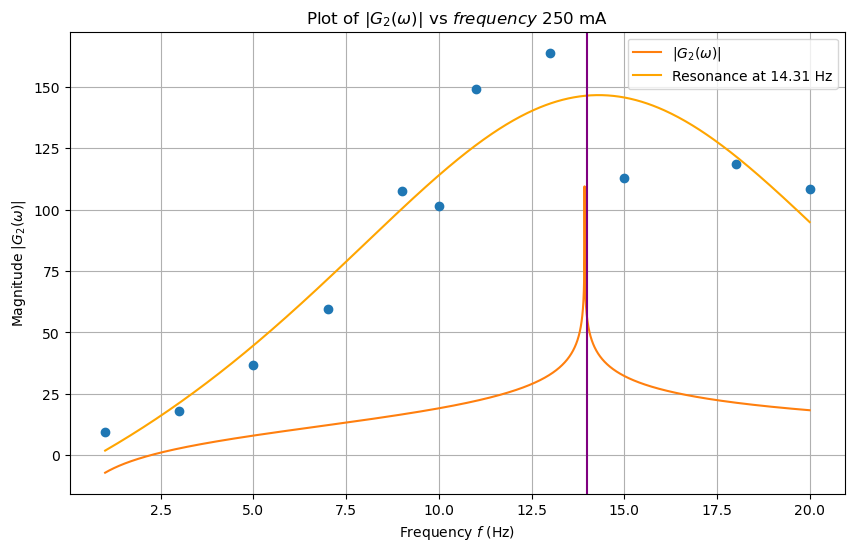

In [598]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants (example values, adjust as needed)
C1 = 0.002366    # Constant C1 N mm^2 / A^2
Ib = 0.250     # Bias current I_b A
C2 = 3.25   # Constant C2 mm
X0 = 0.00245     # Position X_0 mm
Ks = 1608.5    # Spring constant K_s N/mm
m = 0.21    # Mass m kg

# Define the range of omega values
freq = np.linspace(1, 20, 10000)  # Avoid 0 to prevent division by zero
omega = 2 * np.pi * freq

# Define the function
def G2(omega, C1, C2, Ib, X0, Ks, m):
    numerator = (2 * C1 * Ib) * omega
    denominator = (
        (C2 + X0)**2 * (Ks - (2 * C1 * Ib**2) / (C2 + X0)**3 - omega**2 * m)
    )
    return np.abs(numerator / denominator)

# Compute the magnitude of G2(omega)
G2_values = G2(omega, C1, C2, Ib, X0, Ks, m)

# Define the Lorentzian function
def lorentzian(f, Z0, A, f0, gamma):
    return Z0 + (A / ((f - f0)**2 + (gamma / 2)**2))

# Fit the Lorentzian model to your data
initial_guess = [min(amplitude_list), max(amplitude_list), 12.2, 1.0]
params, _ = curve_fit(lorentzian, pfreq, amplitude_list, p0=initial_guess)

# Extract fitted parameters
Z0, A, f0, gamma = params
print(f"Fitted parameters: Z0={Z0}, A={A}, f0={f0}, gamma={gamma}")

# Generate fitted curve data
f_fit = np.linspace(min(pfreq), max(pfreq), 500)
Z_fit = lorentzian(f_fit, *params)

# Plot the magnitude
plt.figure(figsize=(10, 6))
plt.plot(pfreq, amplitude_list, marker = 'o', linestyle = 'none')
plt.plot(freq, 20 * np.log10(G2_values) + 120, label=r"$|G_2(\omega)|$")
plt.plot(f_fit, Z_fit, '-', color='orange', label=f'Resonance at {f0:.2f} Hz')
plt.axvline(x = 14, color = 'purple', linestyle = '-')
plt.xlabel(r"Frequency $f$ (Hz)")
plt.ylabel(r"Magnitude $|G_2(\omega)|$")
plt.title(r"Plot of $|G_2(\omega)|$ vs $frequency$ 250 mA")
plt.grid(True)
plt.legend()
plt.show()

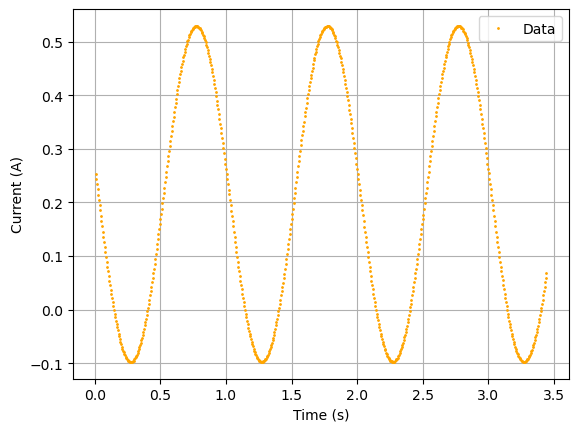

In [607]:
zerobias = pd.read_excel('Lab 6 Part B 600mV 1Hz offset.xlsx', skiprows = 1)

plt.plot(zerobias['Time (s)'], zerobias['Coil Current (A)'], marker = 'o', linestyle = 'none', color = 'orange', markersize = 1, label = 'Data')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend()
plt.show()

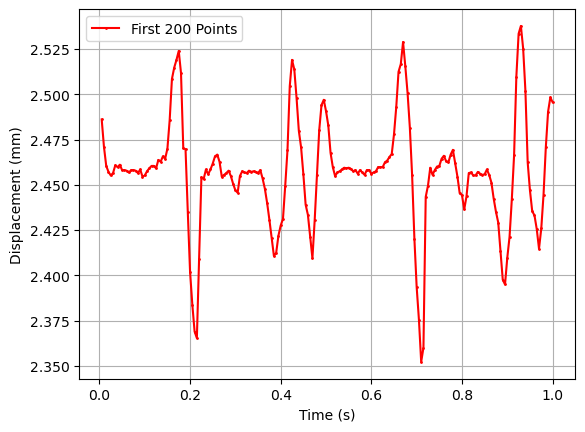

In [611]:
# Slice the DataFrame to include only the first 100 rows
subset = zerobias.iloc[:200]

# Plot the sliced data
plt.plot(subset['Time (s)'], subset['LED (V)'], marker='o', color='red', markersize=1)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (mm)')
plt.grid(True)
plt.legend(["First 200 Points"])
plt.show()